<a href="https://colab.research.google.com/github/yualapshina/ml-lab1/blob/master/ml_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. изучение данных
проведём exploratory data analysis: познакомимся с форматом данных в датасете, почистим его от неудобных нам включений, попробуем проследить зависимости переменных и приведём к виду, с которым далее будет удобно работать

In [1]:
!pip install shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.8 MB/s eta 0:00:00


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import random
import csv
import shap
shap.initjs()

In [3]:
!git clone https://github.com/yualapshina/ml-lab1.git  --quiet

In [4]:
# работу над форматом данных мы будем проводить одинаковую, так что давайте пока что склеим выборки вместе
df_train = pd.read_csv('ml-lab1/x_train.csv')
df_test = pd.read_csv('ml-lab1/x_test.csv')
df_test['Price'] = np.nan
df = pd.concat([df_train, df_test])
df

,Unnamed: 0,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,0,Mitsubishi,2003.0,Pajero,SUV,2003 Mitsubishi Pajero Exceed LWB (4X4),USED,Automatic,"4 cyl, 3.2 L",4WD,Diesel,0 L / 100 km,343128,Silver / Cream Leather,"Stanthorpe, QLD",4 cyl,SUV,4 Doors,7 Seats,9990.0
1,1,Honda,2017.0,CR-V,SUV,2017 Honda CR-V VTI-LX (awd),USED,Automatic,"4 cyl, 1.5 L",AWD,Unleaded,7.4 L / 100 km,130813,Blue / Black,"Ravenhall, VIC",4 cyl,SUV,4 Doors,5 Seats,34990.0
2,2,Honda,2014.0,Fit,USED Dealer ad,2014 Honda Fit,USED,-,-,Other,Other,-,44248,Black / Black,"Minchinbury, NSW",-,Hatchback,NaN,NaN,18995.0
3,3,Toyota,2010.0,Hiace,Commercial,2010 Toyota Hiace LWB,USED,Automatic,"4 cyl, 3 L",Rear,Diesel,8 L / 100 km,147317,Silver / Grey,"Lidcombe, NSW",4 cyl,Commercial,4 Doors,3 Seats,25999.0
4,4,Mercedes-Benz,2015.0,CLA250,Sedan,2015 Mercedes-Benz CLA250 Sport 4Matic,USED,Automatic,"4 cyl, 2 L",AWD,Premium,6.6 L / 100 km,78403,Red / -,"Rozelle, NSW",4 cyl,Sedan,4 Doors,5 Seats,34800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,Mitsubishi,2013.0,Triton,Automobile Gallery,2013 Mitsubishi Triton ML GLX Utility Double C...,USED,Manual,-,Other,Diesel,-,160783,Silver / -,"Granville, NSW",-,Ute / Tray,NaN,NaN,NaN
3333,3333,Mitsubishi,2012.0,Triton,Ute / Tray,2012 Mitsubishi Triton GLX,USED,Automatic,"4 cyl, 2.5 L",Rear,Diesel,9.1 L / 100 km,183512,White / -,"Loganholme, QLD",4 cyl,Ute / Tray,2 Doors,3 Seats,NaN
3334,3334,Kia,2015.0,Cerato,Sedan,2015 Kia Cerato S,USED,Automatic,"4 cyl, 1.8 L",Front,Unleaded,7.1 L / 100 km,88693,White / Grey,"Smeaton Grange, NSW",4 cyl,Sedan,4 Doors,5 Seats,NaN
3335,3335,Hyundai,2017.0,Tucson,Alto Volkswagen Used Cars,2017 Hyundai Tucson Active X 2WD,USED,Automatic,-,Front,Unleaded,-,149585,White / Black Cloth,"Blacktown, NSW",-,Wagon,NaN,NaN,NaN


In [5]:
# можно сразу же заметить, что первый столбец дублирует индекс, так что можем его спокойно удалить
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Mitsubishi,2003.0,Pajero,SUV,2003 Mitsubishi Pajero Exceed LWB (4X4),USED,Automatic,"4 cyl, 3.2 L",4WD,Diesel,0 L / 100 km,343128,Silver / Cream Leather,"Stanthorpe, QLD",4 cyl,SUV,4 Doors,7 Seats,9990.0
1,Honda,2017.0,CR-V,SUV,2017 Honda CR-V VTI-LX (awd),USED,Automatic,"4 cyl, 1.5 L",AWD,Unleaded,7.4 L / 100 km,130813,Blue / Black,"Ravenhall, VIC",4 cyl,SUV,4 Doors,5 Seats,34990.0
2,Honda,2014.0,Fit,USED Dealer ad,2014 Honda Fit,USED,-,-,Other,Other,-,44248,Black / Black,"Minchinbury, NSW",-,Hatchback,NaN,NaN,18995.0
3,Toyota,2010.0,Hiace,Commercial,2010 Toyota Hiace LWB,USED,Automatic,"4 cyl, 3 L",Rear,Diesel,8 L / 100 km,147317,Silver / Grey,"Lidcombe, NSW",4 cyl,Commercial,4 Doors,3 Seats,25999.0
4,Mercedes-Benz,2015.0,CLA250,Sedan,2015 Mercedes-Benz CLA250 Sport 4Matic,USED,Automatic,"4 cyl, 2 L",AWD,Premium,6.6 L / 100 km,78403,Red / -,"Rozelle, NSW",4 cyl,Sedan,4 Doors,5 Seats,34800.0


In [6]:
# изучим типы данных и заодно наличие пустых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16681 entries, 0 to 3336
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16681 non-null  object 
 1   Year               16681 non-null  float64
 2   Model              16681 non-null  object 
 3   Car/Suv            16655 non-null  object 
 4   Title              16681 non-null  object 
 5   UsedOrNew          16681 non-null  object 
 6   Transmission       16681 non-null  object 
 7   Engine             16681 non-null  object 
 8   DriveType          16681 non-null  object 
 9   FuelType           16681 non-null  object 
 10  FuelConsumption    16681 non-null  object 
 11  Kilometres         16681 non-null  object 
 12  ColourExtInt       16681 non-null  object 
 13  Location           16232 non-null  object 
 14  CylindersinEngine  16681 non-null  object 
 15  BodyType           16402 non-null  object 
 16  Doors              1509

In [7]:
# признак "километры" вполне себе числовой, но прочитан как объект, исправим это
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16681 entries, 0 to 3336
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16681 non-null  object 
 1   Year               16681 non-null  float64
 2   Model              16681 non-null  object 
 3   Car/Suv            16655 non-null  object 
 4   Title              16681 non-null  object 
 5   UsedOrNew          16681 non-null  object 
 6   Transmission       16681 non-null  object 
 7   Engine             16681 non-null  object 
 8   DriveType          16681 non-null  object 
 9   FuelType           16681 non-null  object 
 10  FuelConsumption    16681 non-null  object 
 11  Kilometres         16106 non-null  float64
 12  ColourExtInt       16681 non-null  object 
 13  Location           16232 non-null  object 
 14  CylindersinEngine  16681 non-null  object 
 15  BodyType           16402 non-null  object 
 16  Doors              1509

In [8]:
# отсутствующие значения для чисел заполним средним арифметическим, а для нечисловых признаков - самым популярным
# кроме Price, который мы специально оставили пустым для тестовой выборки
df['Kilometres'] = df['Kilometres'].fillna(df['Kilometres'].mean())
text_nas = ['Car/Suv', 'Location', 'BodyType', 'Doors', 'Seats']
for text_na in text_nas:
  df[text_na] = df[text_na].fillna(df[text_na].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16681 entries, 0 to 3336
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16681 non-null  object 
 1   Year               16681 non-null  float64
 2   Model              16681 non-null  object 
 3   Car/Suv            16681 non-null  object 
 4   Title              16681 non-null  object 
 5   UsedOrNew          16681 non-null  object 
 6   Transmission       16681 non-null  object 
 7   Engine             16681 non-null  object 
 8   DriveType          16681 non-null  object 
 9   FuelType           16681 non-null  object 
 10  FuelConsumption    16681 non-null  object 
 11  Kilometres         16681 non-null  float64
 12  ColourExtInt       16681 non-null  object 
 13  Location           16681 non-null  object 
 14  CylindersinEngine  16681 non-null  object 
 15  BodyType           16681 non-null  object 
 16  Doors              1668

In [9]:
# проверим распределение числовых признаков
df.describe()

,Year,Kilometres,Price
count,16681.000000,16681.000000,1.334400e+04
mean,2016.214615,100290.031727,3.738171e+04
std,5.241618,76817.632549,3.770703e+04
min,1940.000000,1.000000,8.800000e+01
25%,2013.000000,43003.000000,1.899900e+04
50%,2017.000000,89713.000000,2.978950e+04
75%,2020.000000,143989.000000,4.399000e+04
max,2023.000000,533849.000000,1.500000e+06


In [10]:
# при внимательном изучении непосредственных данных можно заметить ещё два признака, выглядящие не самыми полезными:
# название, содержащее в себе склееные в одну строку другие признаки,
# и количество цилиндров, которое уже присутствует в признаке Engine.
# можем удалить их
df = df.drop(columns=['Title', 'CylindersinEngine'])

In [11]:
# большинство наших признаков - категориальные. оценим их количество, чтобы найти дальнейший метод работы
df.nunique()

Brand                 76
Year                  45
Model                781
Car/Suv              615
UsedOrNew              3
Transmission           3
Engine               106
DriveType              5
FuelType               9
FuelConsumption      157
Kilometres         14255
ColourExtInt         832
Location             618
BodyType              10
Doors                 13
Seats                 13
Price               3316
dtype: int64

In [12]:
# уникальных значений у нас довольно много, что создаст огромное количество признаков в случае ванхот кодирования.
# а ещё можно заметить, что даже многие текстовые признаки имеют упорядоченность
# (например, количество дверей и мест), так что кажется более логичным использовать в этом случае лейбл кодирование.
df[['Brand', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType',
    'FuelConsumption', 'ColourExtInt', 'Location', 'BodyType', 'Doors', 'Seats']] = df[[
        'Brand', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType',
        'FuelConsumption', 'ColourExtInt', 'Location', 'BodyType', 'Doors', 'Seats']].apply(LabelEncoder().fit_transform)

In [13]:
# вроде бы всё привели в хороший обрабатываемый вид, проверим ещё раз
df

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,BodyType,Doors,Seats,Price
0,53,2003.0,567,466,2,1,42,0,1,1,343128.0,568,514,6,5,10,9990.0
1,30,2017.0,189,466,2,1,26,1,8,131,130813.0,167,449,6,5,8,34990.0
2,30,2014.0,329,561,2,0,0,3,6,0,44248.0,64,351,3,5,8,18995.0
3,73,2010.0,414,153,2,1,41,4,1,137,147317.0,576,308,0,5,6,25999.0
4,51,2015.0,176,472,2,1,31,1,7,123,78403.0,446,467,7,5,8,34800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,53,2013.0,714,60,2,2,0,3,1,0,160783.0,515,233,8,5,8,NaN
3333,53,2012.0,714,567,2,1,36,4,1,148,183512.0,614,316,8,1,6,NaN
3334,40,2015.0,221,472,2,1,29,2,8,128,88693.0,751,492,7,5,8,NaN
3335,32,2017.0,716,35,2,1,0,2,8,0,149585.0,683,63,9,5,8,NaN


<Axes: >

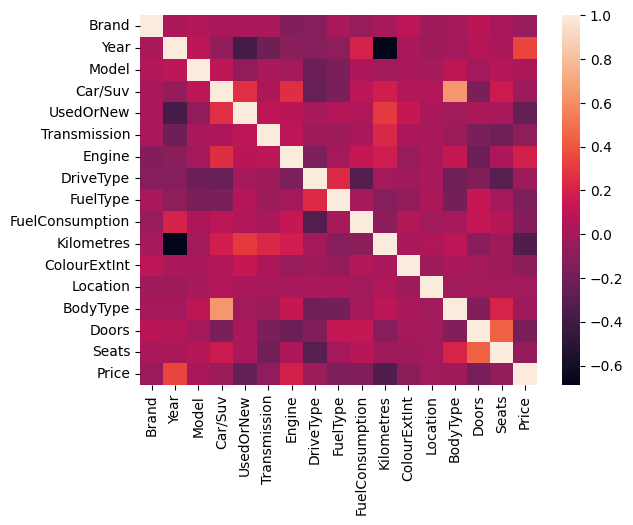

In [14]:
# проверим коррелляции между созданными признаками
sns.heatmap(df.corr())

In [15]:
# полезными признаками для цены кажутся год и двигатель, также можно заметить обратную корреляцию с пробегом

In [16]:
# общая проверка сделана, можно снова разделять данные.
# чтобы иметь возможность оценивать прогресс работы без сабмитов, выделим для себя валидационную выборку.
df_train, df_test = [x for _, x in df.groupby(np.isnan(df['Price']))]
x_test = df_test.drop(columns=['Price'])
x_train = df_train.drop(columns=['Price'])
y_train = df_train['Price']
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.33, random_state=88)

In [17]:
# проведём нормализацию данных
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

# 2. стандартные алгоритмы
данные подготовлены для обучения, и на следующем шаге мы готовы протестировать их на нескольких стандартных алгоритмах для задачи регрессии. посмотрим на линейную регрессию, решающее дерево и стохастический градиентный спуск. оценивать будем по валидационной выборке, используя MSE, указанную в задании.

In [18]:
reg = LinearRegression().fit(x_train, y_train)
print('Linear Regression MSE:', '{0:,}'.format(mean_squared_error(y_valid, reg.predict(x_valid))))

Linear Regression MSE: 904,766,058.9396653


In [19]:
dtr = DecisionTreeRegressor(random_state=88).fit(x_train, y_train)
print('Decision Tree MSE:', '{0:,}'.format(mean_squared_error(y_valid, dtr.predict(x_valid))))

Decision Tree MSE: 650,939,046.7414633


In [20]:
sgd = SGDRegressor(random_state=88).fit(x_train, y_train)
print('Stochastic Gradient Descent MSE:', '{0:,}'.format(mean_squared_error(y_valid, sgd.predict(x_valid))))

Stochastic Gradient Descent MSE: 909,751,206.2624297


In [21]:
# из данных трёх моделей лучший результат показало дерево, так что подбирать гиперпараметры продолжим на нём.

# 3. подбор гиперпараметров

In [22]:
# выберем параметры, которые будем варьировать (почему именно эти? наиболее популярные варианты в туториалах)
# и проверим их комбинации при помощи GridSearch
parameters = {
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 4, 8, 12, 16, 20, 24, 28, 32],
    "min_samples_leaf": [1, 2, 4, 8, 12, 16, 20, 24, 28, 32],
    "max_features": ["log2", "sqrt", None],
    }
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=88), parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=88),
             param_grid={'max_depth': [1, 2, 4, 8, 12, 16, 20, 24, 28, 32],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20, 24, 28,
                                              32],
                         'splitter': ['best', 'random']})

In [23]:
# запросим лучшую комбинацию параметров из проверенных
grid_search.best_params_

{'max_depth': 16,
 'max_features': None,
 'min_samples_leaf': 8,
 'splitter': 'best'}

In [24]:
# проверим её тем же методом, что запускали раньше
dtr = DecisionTreeRegressor(random_state=88, max_depth=16, min_samples_leaf=8).fit(x_train, y_train)
print('Hyperparameter Tuning MSE:', '{0:,}'.format(mean_squared_error(y_valid, dtr.predict(x_valid))))

Hyperparameter Tuning MSE: 551,048,450.9618164


In [25]:
# действительно, по сравнению с параметрами по умолчанию мы скинули сто миллионов в MSE, успешно

# 4. ансамбли (с одной моделью)
деревья пока что проявили себя успешно, так что мы попробуем улучшить их результат совмещением в ансамбли.

In [26]:
# градиентный бустинг реализует с деревьями метод бустинга - обучение каждой следующей модели на ошибках предыдущей
gbr = GradientBoostingRegressor(random_state=88, max_depth=16, min_samples_leaf=8).fit(x_train, y_train)
print('Gradient Boosting MSE:', '{0:,}'.format(mean_squared_error(y_valid, gbr.predict(x_valid))))

Gradient Boosting MSE: 371,235,680.0665764


In [27]:
# случайный лес реализует с деревьями метод бэггинга - обучение нескольких моделей параллельно и усреднение их результатов
rfr = RandomForestRegressor(random_state=88, max_depth=16, min_samples_leaf=8).fit(x_train, y_train)
print('Random Forest MSE:', '{0:,}'.format(mean_squared_error(y_valid, rfr.predict(x_valid))))

Random Forest MSE: 466,787,552.5268134


In [28]:
# оба метода значительно улучшили результаты, но бустинг - сильнее.

# 5. ансамбли (с разными моделями)
дальше мы попробуем использовать метод стекинга, который заключается в объединении разных моделей. в качестве базы попробуем совместить три наши лучшие модели, а с ролью мета-модели должна справиться банальная линейная регрессия.

In [29]:
stckr = StackingRegressor(
    estimators=[
        ('gbr', GradientBoostingRegressor(random_state=88, max_depth=16, min_samples_leaf=8)),
        ('rfr', RandomForestRegressor(random_state=88, max_depth=16, min_samples_leaf=8)),
        ('dtr', DecisionTreeRegressor(random_state=88, max_depth=16, min_samples_leaf=8)),
    ],
    final_estimator=LinearRegression(),
    ).fit(x_train, y_train)
print('Stacking MSE:', '{0:,}'.format(mean_squared_error(y_valid, stckr.predict(x_valid))))

Stacking MSE: 369,145,350.4560744


In [30]:
# положительное изменение есть, конечно, но в некотором смысле им окупается значительно падение скорости вычислений,
# а ещё стекинг неудобно анализировать в следующем пункте, поэтому оставим нашей рабочей моделью градиентный бустинг

# 6. анализ интерпретируемости

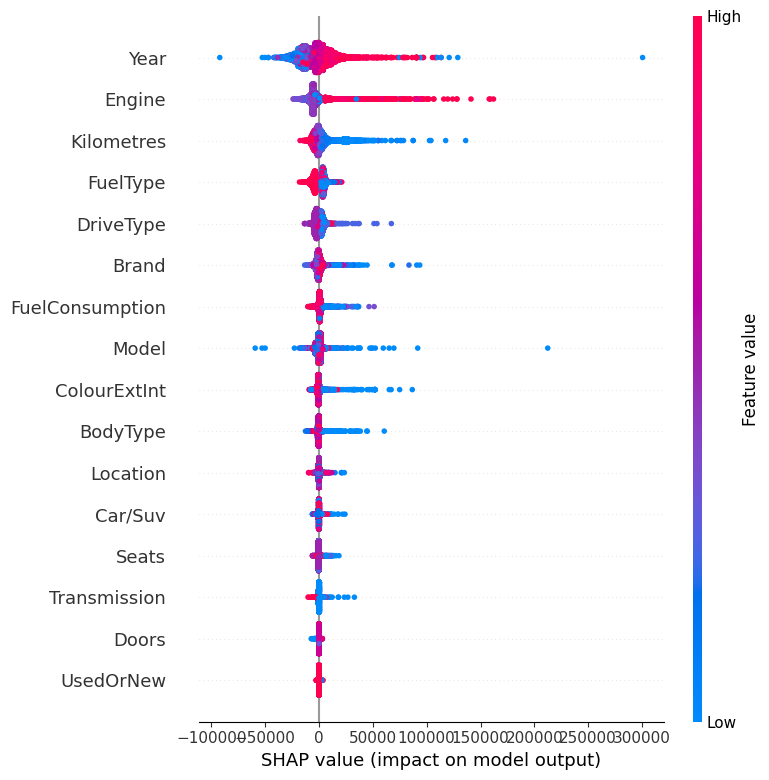

In [31]:
explainer = shap.Explainer(gbr, feature_names=df_train.columns)
shap_values = explainer(x_train)
shap.summary_plot(shap_values)

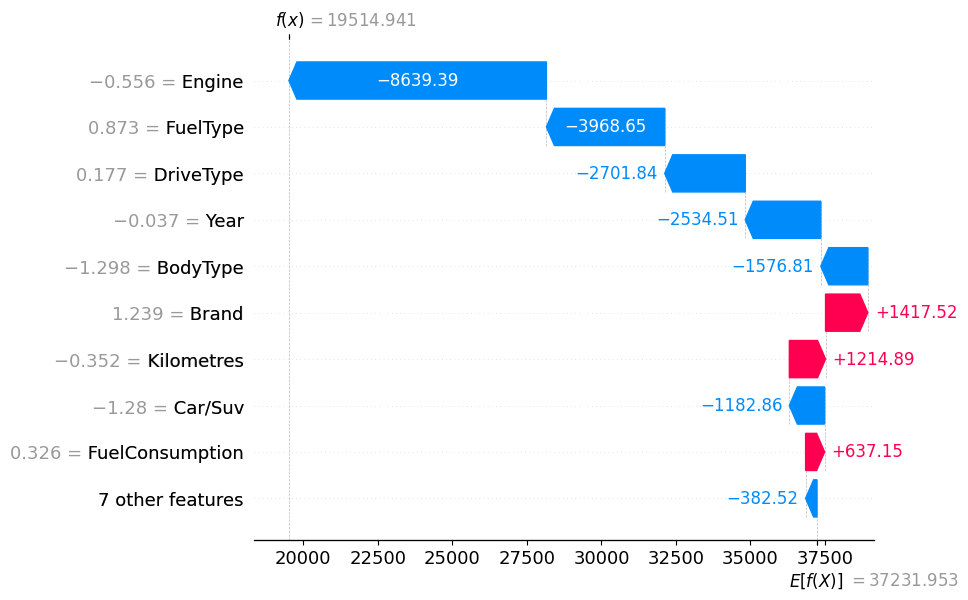

In [32]:
# по графику влияния признаков можем наблюдать, что год и двигатель демонстрируют
# наиболее сильную положительную корреляцию с целевой переменной, а пробег - отрицательную.
# что, в общем-то, совпадает с выводами, которые мы сделали по хитмапу на первом этапе.

# а ещё интересно проанализировать, например, влияние признаков на каждую конкретную запись
shap.plots.waterfall(shap_values[random.randint(0, len(x_train) - 1)])

# 7. сабмит результатов
для финальной отправки мы воспользуемся лучшей из подобранных моделей и обучим её на всём предоставленном нам тренировочном датасете.

In [33]:
df_train, df_test = [x for _, x in df.groupby(np.isnan(df['Price']))]
x_test = df_test.drop(columns=['Price'])
x_train = df_train.drop(columns=['Price'])
y_train = df_train['Price']

gbr = GradientBoostingRegressor(random_state=88, max_depth=16, min_samples_leaf=8).fit(x_train, y_train)
y_test = gbr.predict(x_test)

In [34]:
with open('ml-lab1/submit.csv','w') as output:
  writer = csv.writer(output, delimiter=',')
  writer.writerow(['ID', 'PRICE'])
  for i in range(len(y_test)):
    writer.writerow([i, y_test[i]])

submit = pd.read_csv('ml-lab1/submit.csv')
submit

,ID,PRICE
0,0,21902.986843
1,1,23520.194053
2,2,32680.338889
3,3,8772.267082
4,4,43877.613216
...,...,...
3332,3332,23520.822520
3333,3333,18136.345985
3334,3334,17663.496658
3335,3335,22884.774008
